Import Libraries 

In [120]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

Load dataset 

In [121]:
df = pd.read_csv("Tetuan City power consumption.csv")

In [122]:
df.head(2)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434


In [123]:
df.tail(2)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [124]:
df.describe

<bound method NDFrame.describe of                DateTime  Temperature  Humidity  Wind Speed  \
0         1/1/2017 0:00        6.559      73.8       0.083   
1         1/1/2017 0:10        6.414      74.5       0.083   
2         1/1/2017 0:20        6.313      74.5       0.080   
3         1/1/2017 0:30        6.121      75.0       0.083   
4         1/1/2017 0:40        5.921      75.7       0.081   
...                 ...          ...       ...         ...   
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                      0.051          0.119               34055.69620   
1                      0.070          0.085               29814.68354   
2 

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [126]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

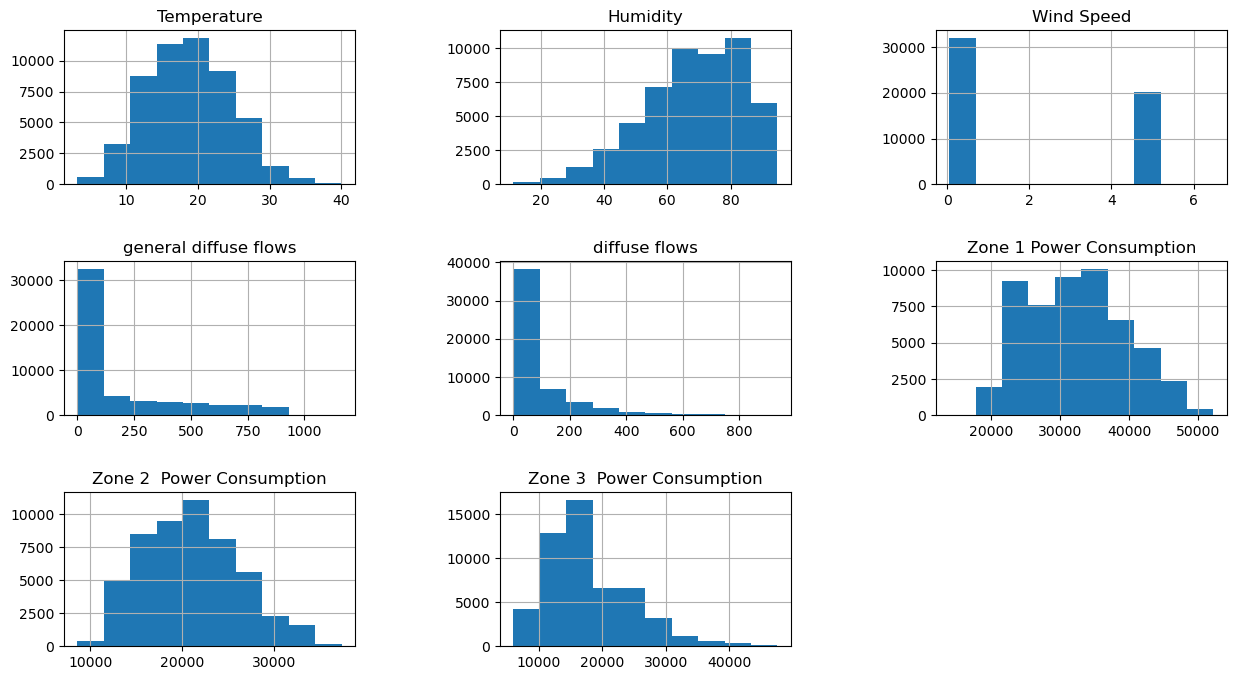

In [127]:
ax = df.hist(figsize=(15, 8))  

plt.subplots_adjust(hspace=0.5, wspace=0.5)  
plt.show()

Clean Date time Variable 

In [128]:
df[['Date', 'Time']] = df['DateTime'].str.split(' ', expand=True)
df = df.drop(columns=['DateTime'])
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [129]:
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Date,Time,Year,Month
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,0:00,2017,1
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,0:10,2017,1
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,0:20,2017,1
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,0:30,2017,1
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,0:40,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017-12-30,23:10,2017,12
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017-12-30,23:20,2017,12
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017-12-30,23:30,2017,12
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017-12-30,23:40,2017,12


Monthly electricty consumption in Each Zone

In [130]:
zone1_monthly_average_Power = df.groupby(['Year', 'Month'])['Zone 1 Power Consumption'].mean().reset_index()
zone1_monthly_average_Power

,Year,Month,Zone 1 Power Consumption
0,2017,1,31032.493535
1,2017,2,30985.753632
2,2017,3,31155.165408
3,2017,4,31169.768210
4,2017,5,32396.009166
5,2017,6,34605.540839
6,2017,7,35831.553603
7,2017,8,36435.189574
8,2017,9,33396.681416
9,2017,10,32827.660055


In [131]:
zone2_monthly_average_Power = df.groupby(['Year', 'Month'])['Zone 2  Power Consumption'].mean().reset_index()
zone2_monthly_average_Power

,Year,Month,Zone 2 Power Consumption
0,2017,1,19394.444717
1,2017,2,18787.793096
2,2017,3,18457.937484
3,2017,4,17633.966395
4,2017,5,19977.287859
5,2017,6,20670.928621
6,2017,7,24147.886893
7,2017,8,24656.216575
8,2017,9,20180.432259
9,2017,10,21468.993441


In [132]:
zone3_monthly_average_Power = df.groupby(['Year', 'Month'])['Zone 3  Power Consumption'].mean().reset_index()
zone3_monthly_average_Power

,Year,Month,Zone 3 Power Consumption
0,2017,1,17746.095349
1,2017,2,17335.002154
2,2017,3,16947.686004
3,2017,4,18593.167677
4,2017,5,17621.100953
5,2017,6,20430.941538
6,2017,7,28194.111216
7,2017,8,24648.894732
8,2017,9,14922.798774
9,2017,10,13264.095173


Visualize monthly Electricity Consumption for each Zone 

Zone

<Axes: >

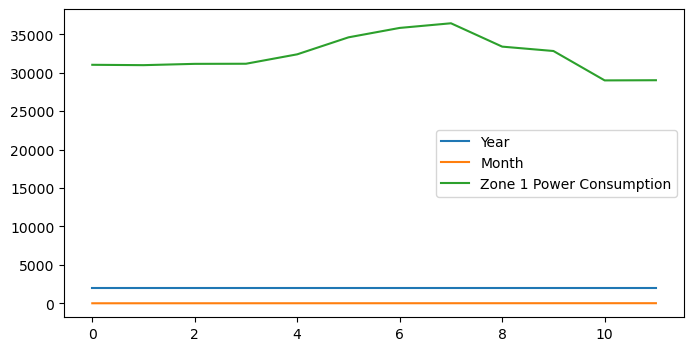

In [133]:
zone1_monthly_average_Power.plot(kind='line',
figsize=(8,4))


In [134]:
zone1_monthly_average_Power.columns

Index(['Year', 'Month', 'Zone 1 Power Consumption'], dtype='object')

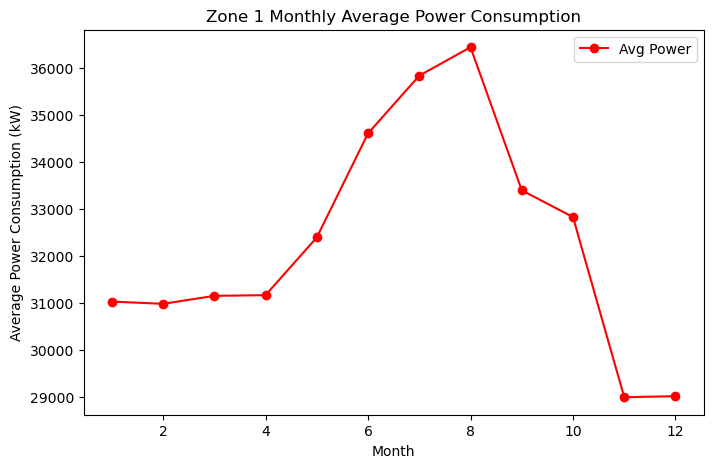

In [135]:
# Plot Line Graph
plt.figure(figsize=(8,5))
plt.plot(zone1_monthly_average_Power['Month'], zone1_monthly_average_Power['Zone 1 Power Consumption'], marker='o', linestyle='-', color='red', label='Avg Power')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Zone 1 Monthly Average Power Consumption')
plt.legend()
plt.show()

Zone 2

In [136]:
zone2_monthly_average_Power.columns

Index(['Year', 'Month', 'Zone 2  Power Consumption'], dtype='object')

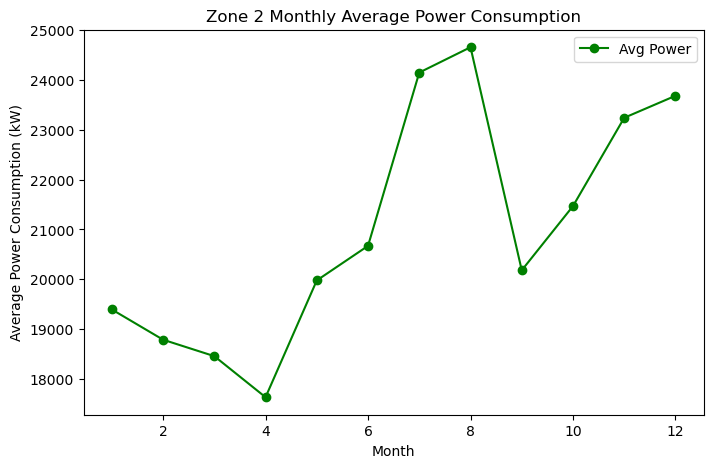

In [137]:
plt.figure(figsize=(8,5))
plt.plot(zone2_monthly_average_Power['Month'], zone2_monthly_average_Power['Zone 2  Power Consumption'], marker='o', linestyle='-', color='green', label='Avg Power')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Zone 2 Monthly Average Power Consumption')
plt.legend()
plt.show()

Zone 3

In [138]:
zone3_monthly_average_Power.columns

Index(['Year', 'Month', 'Zone 3  Power Consumption'], dtype='object')

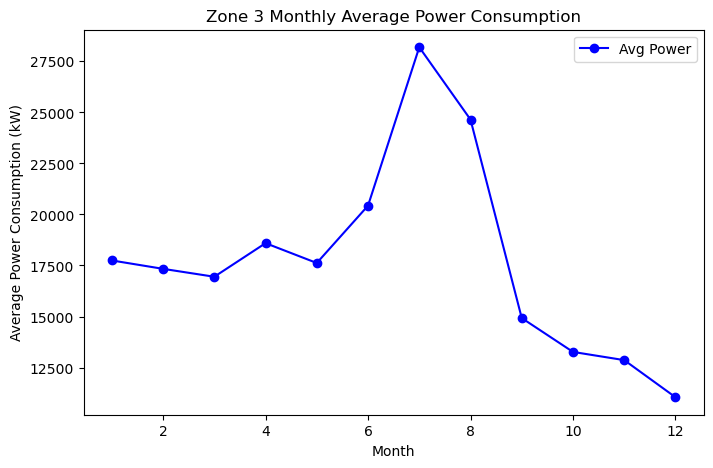

In [139]:
plt.figure(figsize=(8,5))
plt.plot(zone3_monthly_average_Power['Month'], zone3_monthly_average_Power['Zone 3  Power Consumption'], marker='o', linestyle='-', color='b', label='Avg Power')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Zone 3 Monthly Average Power Consumption')
plt.legend()
plt.show()

In [140]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Date',
       'Time', 'Year', 'Month'],
      dtype='object')

Correlation between temperature, humidity, Wind speed and energy consumption in each zone 

In [141]:
df[['Temperature', 'Humidity', 'Wind Speed','Zone 1 Power Consumption']].corr() #use double brackets when selecting more than one column

,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.440221
Humidity,-0.460243,1.000000,-0.135853,-0.287421
Wind Speed,0.477109,-0.135853,1.000000,0.167444
Zone 1 Power Consumption,0.440221,-0.287421,0.167444,1.000000


In [142]:
df[['Temperature', 'Humidity', 'Wind Speed','Zone 2  Power Consumption']].corr()

,Temperature,Humidity,Wind Speed,Zone 2 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.382428
Humidity,-0.460243,1.000000,-0.135853,-0.294961
Wind Speed,0.477109,-0.135853,1.000000,0.146413
Zone 2 Power Consumption,0.382428,-0.294961,0.146413,1.000000


In [143]:
df[['Temperature', 'Humidity', 'Wind Speed','Zone 3  Power Consumption']].corr()

,Temperature,Humidity,Wind Speed,Zone 3 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.233022
Wind Speed,0.477109,-0.135853,1.000000,0.278641
Zone 3 Power Consumption,0.489527,-0.233022,0.278641,1.000000


Regression Analysis for each Zone

Zone 1

In [ ]:
x = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows']]                                
y = df['Zone 1 Power Consumption']                                  
model = sm.OLS(y, sm.add_constant(x))      
result = model.fit()                        
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.207
Model:                                  OLS   Adj. R-squared:                  0.207
Method:                       Least Squares   F-statistic:                     2741.
Date:                      Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                              00:40:20   Log-Likelihood:            -5.3333e+05
No. Observations:                     52416   AIC:                         1.067e+06
Df Residuals:                         52410   BIC:                         1.067e+06
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.675e+04    213.778    125.132      0.000    2.63e+04    2.72e+04
Temperature             534.8607      6.418     83.331      0.000     522.280     547.441
Humidity                -56.5101      2.130    -26.525      0.000     -60.686     -52.334
Wind Speed             -148.7016     13.579    -10.951      0.000    -175.317    -122.087
general diffuse flows    -1.7020      0.146    -11.628      0.000      -1.989      -1.415
diffuse flows            -0.0873      0.272     -0.321      0.748      -0.621       0.446
==============================================================================
Omnibus:                     2680.508   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2082.118
Skew:                           0.400   Prob(JB):                         0.00
Kurtosis:                       2.440   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Zone 2

In [ ]:
x = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows']]                                
y = df['Zone 1 Power Consumption']                                  
model = sm.OLS(y, sm.add_constant(x))      
result = model.fit()                        
result.summary() 

Zone 3

In [ ]:
x = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows']]                                
y = df['Zone 1 Power Consumption']                                  
model = sm.OLS(y, sm.add_constant(x))      
result = model.fit()                        
result.summary() 